<a href="https://colab.research.google.com/github/stefano2211/RepositorioDataScienceProjects/blob/main/LeadScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lead Scoring

##Problem

An education company named __X Education__ sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. <br>

__When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.__<br>

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. __The typical lead conversion rate at X education is around 30%.__
 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as __‘Hot Leads’__. <br>

If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

__Lead Conversion Process__ - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom.<br>

In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. <br>
The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

__The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.__


 

## Data

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

Another thing that you also need to check out for are the levels present in the categorical variables.<br>

__Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.__

 

## Goal


1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

#Import Package

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


#Load Dataset

In [3]:
dt = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRZ7f9UYeHwYp6f9ZrcNci77ofyhHt7lKAMwgR8-BXLSpxq1uzmo2yLSO-nLb7QKdxlzv3QLdVVfamJ/pub?gid=52960586&single=true&output=csv')

#Data Exploratory

In [4]:
dt.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
dt.shape

(9240, 37)

In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
dt.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [159]:
#Classes 
dt.Converted.value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

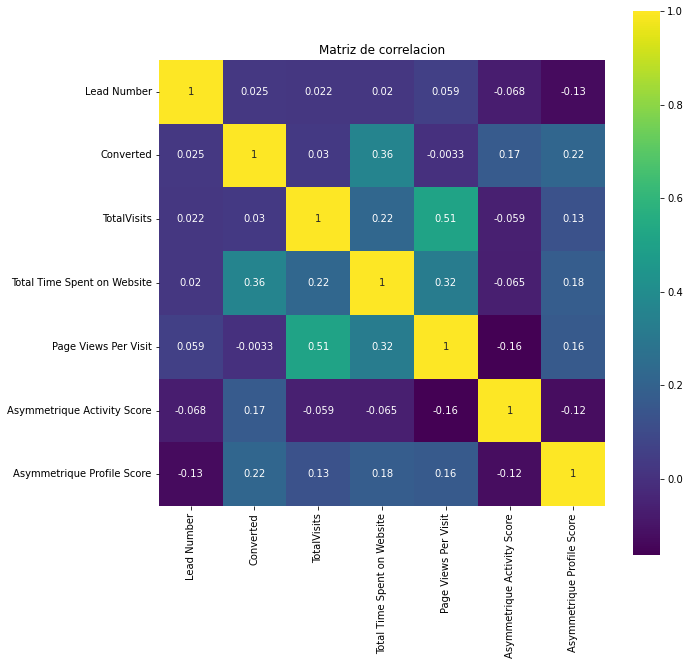

In [9]:
cor = dt.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(cor, vmax=1, square=True, annot=True, cmap='viridis')
plt.title("Matriz de correlacion")
plt.show()

<ipython-input-10-3b87f88815c3>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dt.hist(ax = ax)


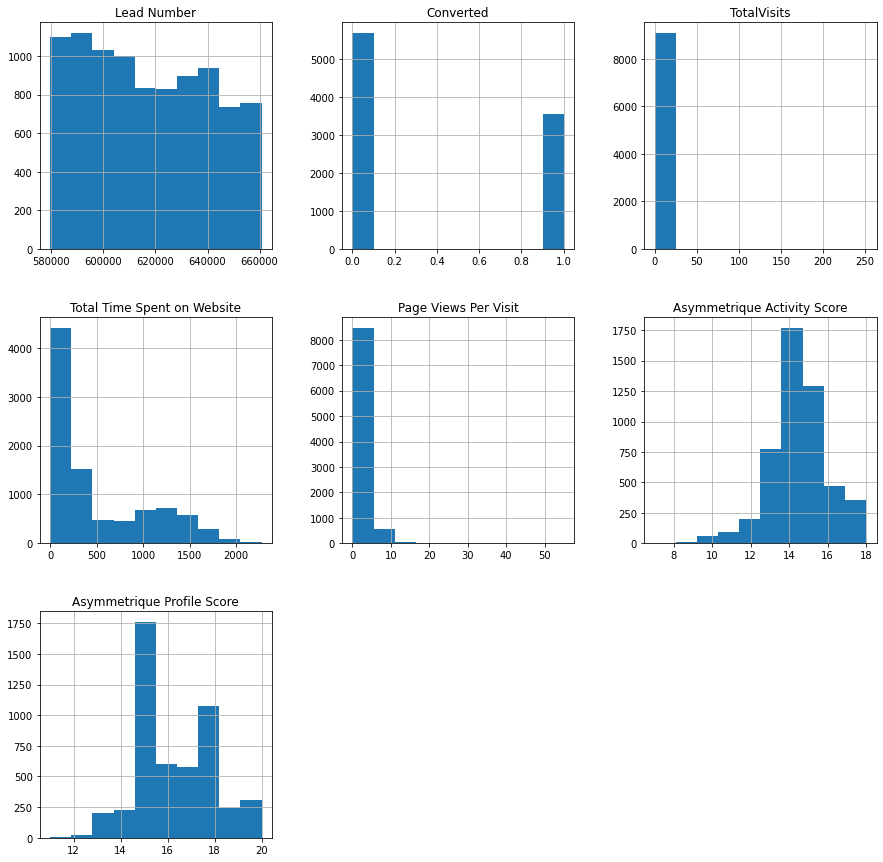

In [10]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
dt.hist(ax = ax)
plt.show()

#Data Cleaning

In [11]:
#Replace Select values for Nan values
df = dt.replace('Select', np.nan)

In [12]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [13]:
#Porcentage of Nan values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

###Lead Profile

In [14]:
#We drop Lead Profile because the 70% of the data in this column are Nan values
data = df.drop(df.loc[:,list(round(100*(df.isnull().sum()/len(df.index)), 2)>70)].columns, 1)

<ipython-input-14-0c31a2a5d59f>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = df.drop(df.loc[:,list(round(100*(df.isnull().sum()/len(df.index)), 2)>70)].columns, 1)


###Lead Quality

In [15]:
#We clean de Lead Quality this column have 51.59% of Nan values
data['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

In [16]:
values = data['Lead Quality'].value_counts()

In [17]:
#Replace the Nan values for Not Sure
data['Lead Quality'] = data['Lead Quality'].replace(np.nan, 'Not Sure')

In [18]:
fig = px.bar(values)
fig.show()

1. ### Asymmetrique Activity Index  
2. ### Asymmetrique Profile Index   
3. ### Asymmetrique Activity Score  
4. ### Asymmetrique Profile Score

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass t

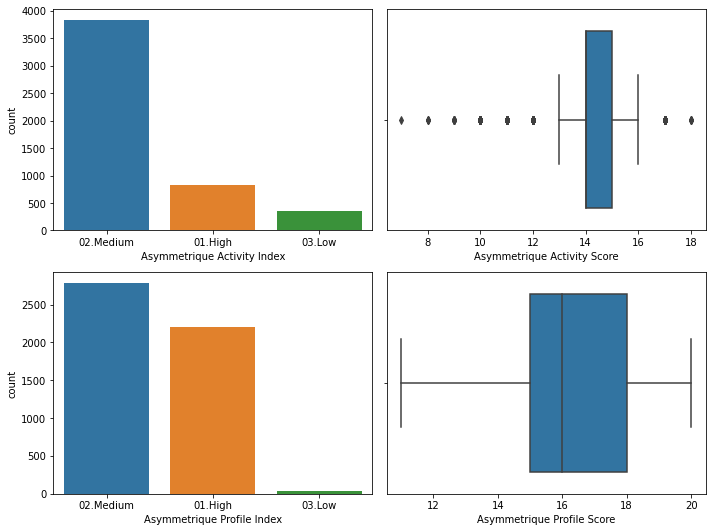

In [19]:
fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(data['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(data['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(data['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(data['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

These columns havo to much variation and have 45% Nan values

In [20]:
data = data.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

<ipython-input-20-51baf752fef7>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



###City

In [21]:
CityValue = data.City.value_counts()

In [22]:
df = pd.DataFrame(data=CityValue)

In [23]:
dfi = df.reset_index()

In [24]:
df = dfi.rename(columns={'index':'City',
                        'City':'Count'})



In [25]:
fig = px.pie(df, values=df['Count'], names=df['City'])
fig.show()

In [26]:
#The 58% of the data are in Munbai, we replace the Nan values for Mumbai

In [27]:
data['City'] = data['City'].replace(np.nan, 'Mumbai')

###Specailization

In [28]:
data.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [29]:
SpeValue = data.Specialization.value_counts()

In [30]:
fig = px.bar(SpeValue)
fig.show()

In [31]:
#We replace the Nan value with Other
data['Specialization'] = data['Specialization'].replace(np.nan, 'Others')

In [32]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

###Tags

In [33]:
data.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [34]:
TagsCount = data.Tags.value_counts()

In [35]:
fig = px.bar(TagsCount)
fig.show()

In [36]:
#Replace the Nan values with the value "Will revert after reading the email"

In [37]:
data['Tags'] = data['Tags'].replace(np.nan, 'Will revert after reading the email')

In [38]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

###What matters most to you in choosing a course

In [39]:
data['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [40]:
data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [41]:
#Replace Nan values with "Better Career Prospects"
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

###Ocupation

In [42]:
data['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [43]:
JobValue = data['What is your current occupation'].value_counts()

In [44]:
fig = px.bar(JobValue)
fig.show()

In [45]:
#We replace the Nan values with "Unemployed" 

In [46]:
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unemployed')

###Country

In [47]:
data['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [48]:
CountryValue = data.Country.value_counts()

In [49]:
fig = px.bar(CountryValue)
fig.show()

In [50]:
# Country is India for most values so let's impute the same in missing values.
data['Country'] = data['Country'].replace(np.nan, 'India')

In [51]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [52]:
#We remove the remaining Nan values
data.dropna(inplace = True)

In [53]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [54]:
dataframe = data

#Data Exploratory

In [55]:
#Conversion rate 

Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

37.85541106458012

Customer conversion rate is 38%.

In [56]:
df = data

In [57]:
#catagorical columns
cat_cols = [col for col in df.select_dtypes(exclude = np.number).columns]
cat_cols

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [58]:
df[cat_cols].nunique().sort_values()

I agree to pay the amount through cheque            1
Get updates on DM Content                           1
Update me on Supply Chain Content                   1
Receive More Updates About Our Courses              1
Magazine                                            1
Newspaper Article                                   2
Through Recommendations                             2
Do Not Email                                        2
Do Not Call                                         2
Digital Advertisement                               2
Newspaper                                           2
Search                                              2
A free copy of Mastering The Interview              2
X Education Forums                                  2
What matters most to you in choosing a course       3
Lead Origin                                         4
Lead Quality                                        5
City                                                6
What is your current occupat

In [59]:
#Identifying redundant features, which have only one level
x = df[cat_cols].nunique()
cols_to_drop = list(x[x < 2].index)
cols_to_drop

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [60]:
#dropping the columns in col_to_drop
df.drop(cols_to_drop, axis = 1, inplace = True)
cat_cols = list(set(cat_cols) - set(cols_to_drop))

In [61]:
#binary catagorical variables
x = df[cat_cols].nunique()
binary_cat_cols = list(x[x == 2].index)
binary_cat_cols

['Digital Advertisement',
 'Newspaper',
 'Newspaper Article',
 'Do Not Email',
 'Do Not Call',
 'Search',
 'Through Recommendations',
 'X Education Forums',
 'A free copy of Mastering The Interview']

In [62]:
sns.set_style("whitegrid", {"grid.color": ".2", "grid.linestyle": ":"})

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

###Lead Origin

In [64]:
def hue_count(x, y, p = 'deep'):
    ax = sns.countplot(df[x], hue = df[y], palette = p)
    ax.set_title('"{}" Composition'.format(x), fontsize = 15, fontweight = 'bold', pad = 5)
    ax.set_xlabel(x, fontsize = 14)
    ax.set_ylabel('Count', fontsize = 14)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)  


#Function for visualizing numerical and catagorical variables together, box plot

def box_plot2(x, y, p = 'deep'):
    ax = sns.boxplot(df[x], df[y], palette = p, showfliers = True, showmeans = True, 
                     meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"crimson"})
    ax.set_title('Distribution of "{}"'.format(y), fontsize = 15, fontweight = 'bold', pad = 5)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)

In [65]:
#Function for visualizing conversion rate of categories

def conversion_rate_plot(x, y = 'Converted', p = 'deep'):
    ax = sns.barplot(df[x], df[y], estimator = np.mean, palette = p, ci = None)
    ax.set_title('Conversion Rate'.format(y,x), fontsize = 15, fontweight = 'bold', pad = 5)
    ax.set_xlabel(x, fontsize = 14)
    ax.set_ylabel('Rate', fontsize = 14)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)
    for k in ax.patches:
        ax.annotate('{:.1f} %'.format(k.get_height()*100),(k.get_x()+0.25, k.get_height()))

In [66]:
#Lead Origin

df['Lead Origin'].value_counts(normalize = True).mul(100).round(2)

Landing Page Submission    53.84
API                        39.43
Lead Add Form               6.40
Lead Import                 0.33
Name: Lead Origin, dtype: float64

In [67]:
df['Lead Origin'].replace({'Quick Add Form': 'Lead Add Form'}, inplace = True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



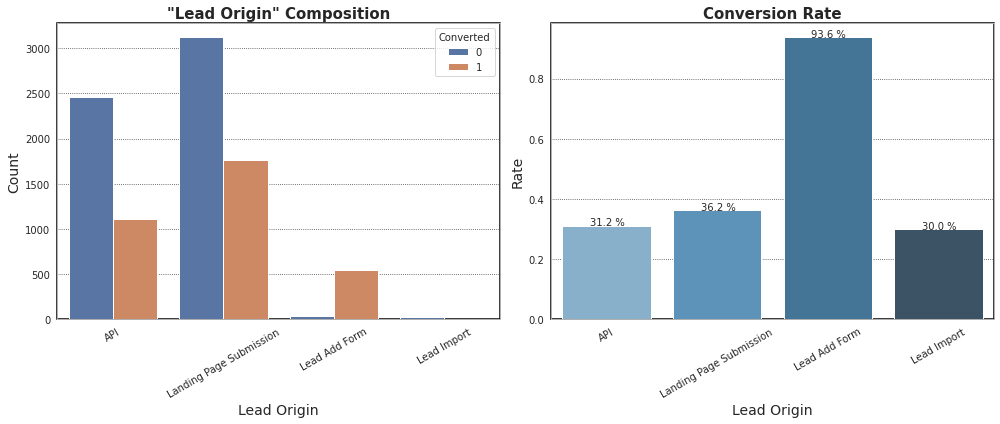

In [68]:
#Lead Origin

plt.figure(figsize = [14,6])
plt.subplot(121)
hue_count('Lead Origin', 'Converted')
plt.xticks(rotation = 30)

# Rate of conversion
plt.subplot(122)
conversion_rate_plot('Lead Origin', 'Converted', p = 'Blues_d')
plt.xticks(rotation = 30)

plt.tight_layout()

The graph shows that the pages that receive the most traffic are not converting enough, which are the Landing Page Submition and the Api, while the lead add form has a very high conversion rate but does not have enough traffic. 

###Lead Source 

In [69]:
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



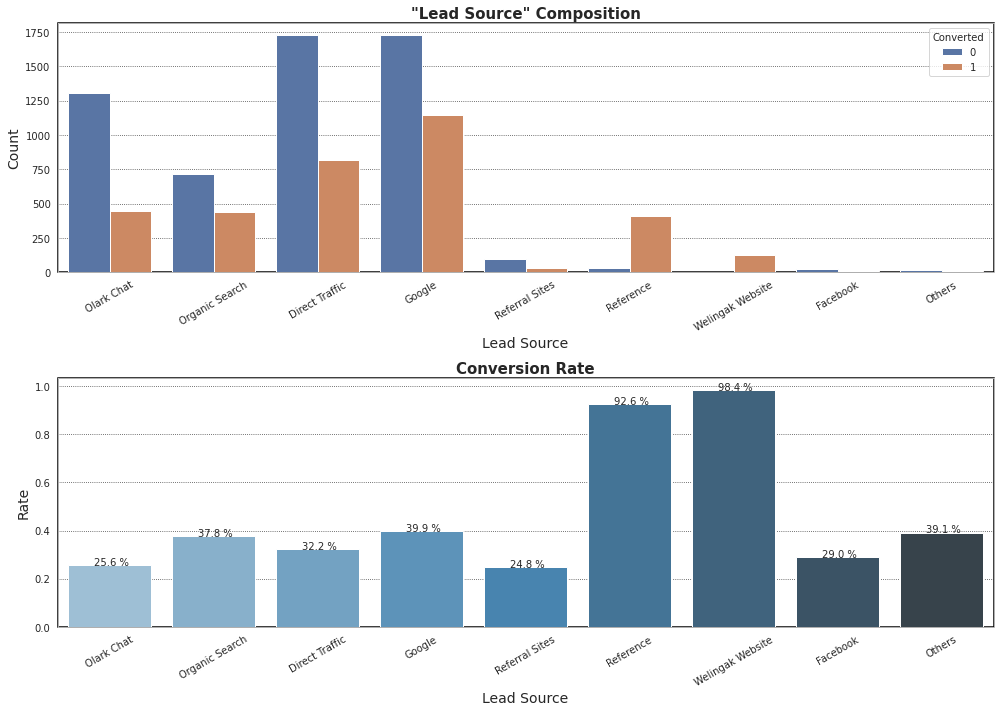

In [70]:
#Lead Source

plt.figure(figsize = [14,10])
plt.subplot(211)
hue_count('Lead Source', 'Converted')
plt.xticks(rotation = 30)

# Rate of conversion
plt.subplot(212)
conversion_rate_plot('Lead Source', 'Converted', p = 'Blues_d')
plt.xticks(rotation = 30)

plt.tight_layout()

* Google and direct traffic need more attention as they receive the most traffic but do not convert enough between the two converts 72%.

* References and welingak website convert at a higher magnitude but do not receive enough traffic.

###Binary Categories

In [71]:
#binary catagorical variables
x = df[cat_cols].nunique()
binary_cat_cols = list(x[x == 2].index)
binary_cat_cols

['Digital Advertisement',
 'Newspaper',
 'Newspaper Article',
 'Do Not Email',
 'Do Not Call',
 'Search',
 'Through Recommendations',
 'X Education Forums',
 'A free copy of Mastering The Interview']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass t

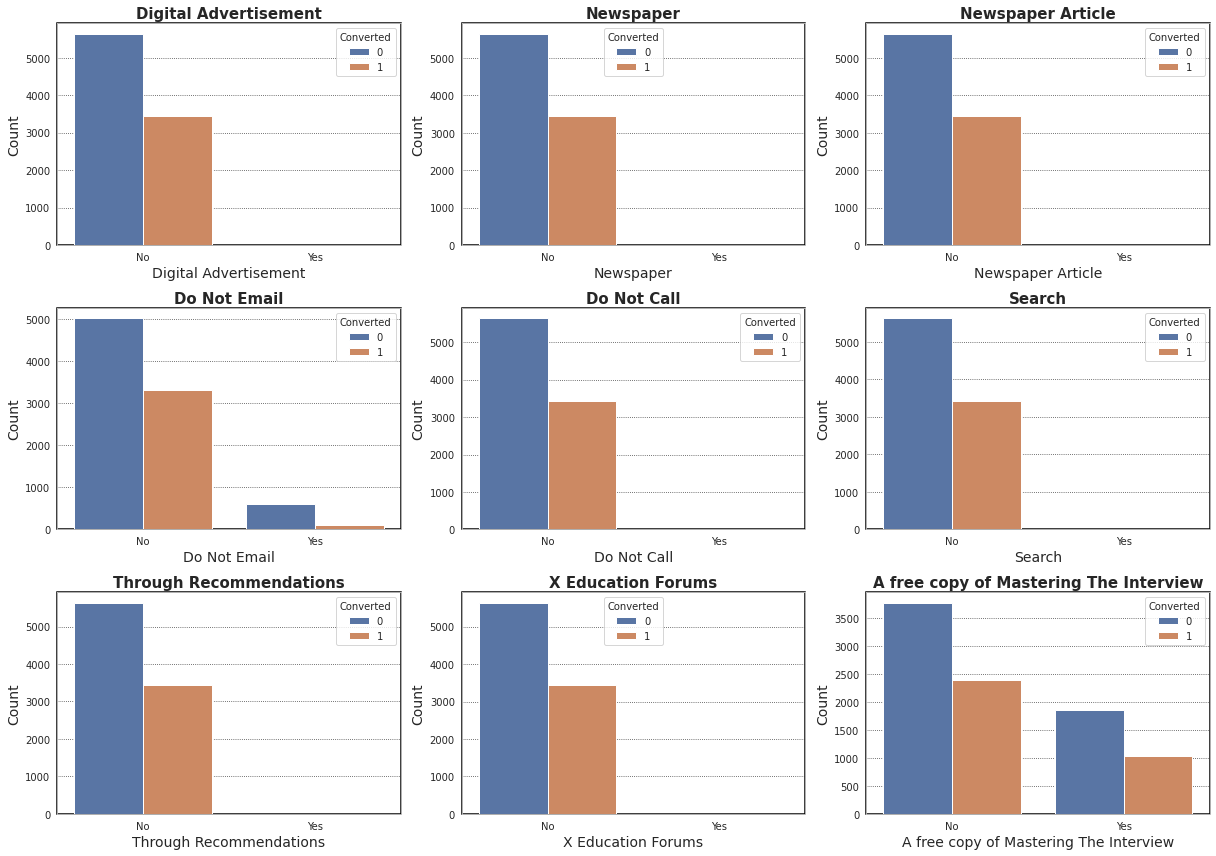

In [72]:
#visualizing binary catagorical variables
plt.figure(figsize = [17, 12])
for i in range(len(binary_cat_cols)):
    plt.subplot(3, 3, i+1)
    x, y = binary_cat_cols[i], 'Converted'
    ax = sns.countplot(df[x], hue = df[y], palette = 'deep')
    ax.set_title('{}'.format(x), fontsize = 15, fontweight = 'bold', pad = 5)
    ax.set_xlabel(x, fontsize = 14)
    ax.set_ylabel('Count', fontsize = 14)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)  
plt.tight_layout()

None of the binary categorization data is very promising.

###Last Activity

In [73]:
data['Last Activity'] = data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



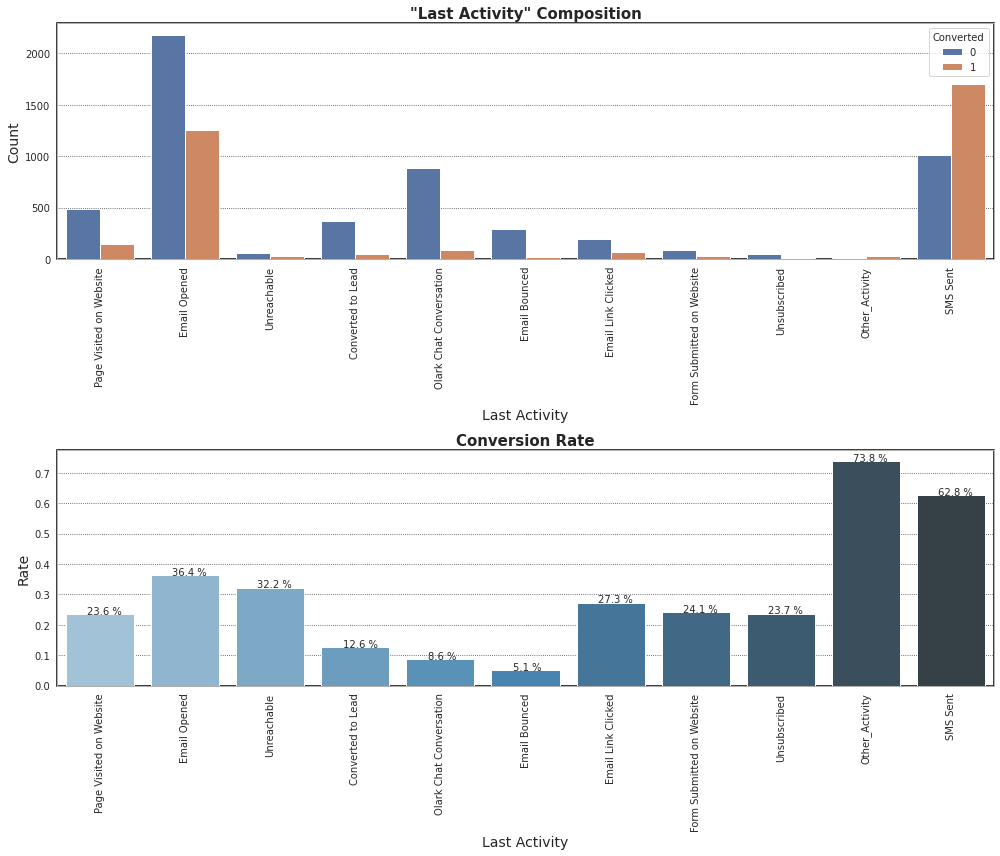

In [74]:
#Last Activity

plt.figure(figsize = [14,12])
plt.subplot(211)
hue_count('Last Activity', 'Converted')
plt.xticks(rotation = 90)

# Rate of conversion
plt.subplot(212)
conversion_rate_plot('Last Activity', 'Converted', p = 'Blues_d')
plt.xticks(rotation = 90)

plt.tight_layout()

* The email marketing strategy needs to be reviewed as there is a huge amount of email traffic that is not being taken advantage of and we are only converting 36%.

* The high conversion rate is in sms with a 62.8% conversion rate. 

###Specialization

In [75]:
#Specialization

df['Specialization'].value_counts(normalize = True).mul(100).round(2)

Others                               36.17
Finance Management                   10.57
Human Resource Management             9.22
Marketing Management                  9.07
Operations Management                 5.50
Business Administration               4.40
IT Projects Management                4.03
Supply Chain Management               3.81
Banking, Investment And Insurance     3.69
Travel and Tourism                    2.23
Media and Advertising                 2.23
International Business                1.94
Healthcare Management                 1.72
E-COMMERCE                            1.22
Hospitality Management                1.22
Retail Management                     1.10
Rural and Agribusiness                0.80
E-Business                            0.63
Services Excellence                   0.44
Name: Specialization, dtype: float64

In [76]:
#combining less frequent levels into one, 'Others'
x = df['Specialization'].value_counts(normalize = True).mul(100)
df['Specialization'] = df['Specialization'].replace(list(x[x < 2].index), 'Others')

df['Specialization'].value_counts(normalize = True).mul(100).round(2)

Others                               45.25
Finance Management                   10.57
Human Resource Management             9.22
Marketing Management                  9.07
Operations Management                 5.50
Business Administration               4.40
IT Projects Management                4.03
Supply Chain Management               3.81
Banking, Investment And Insurance     3.69
Media and Advertising                 2.23
Travel and Tourism                    2.23
Name: Specialization, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



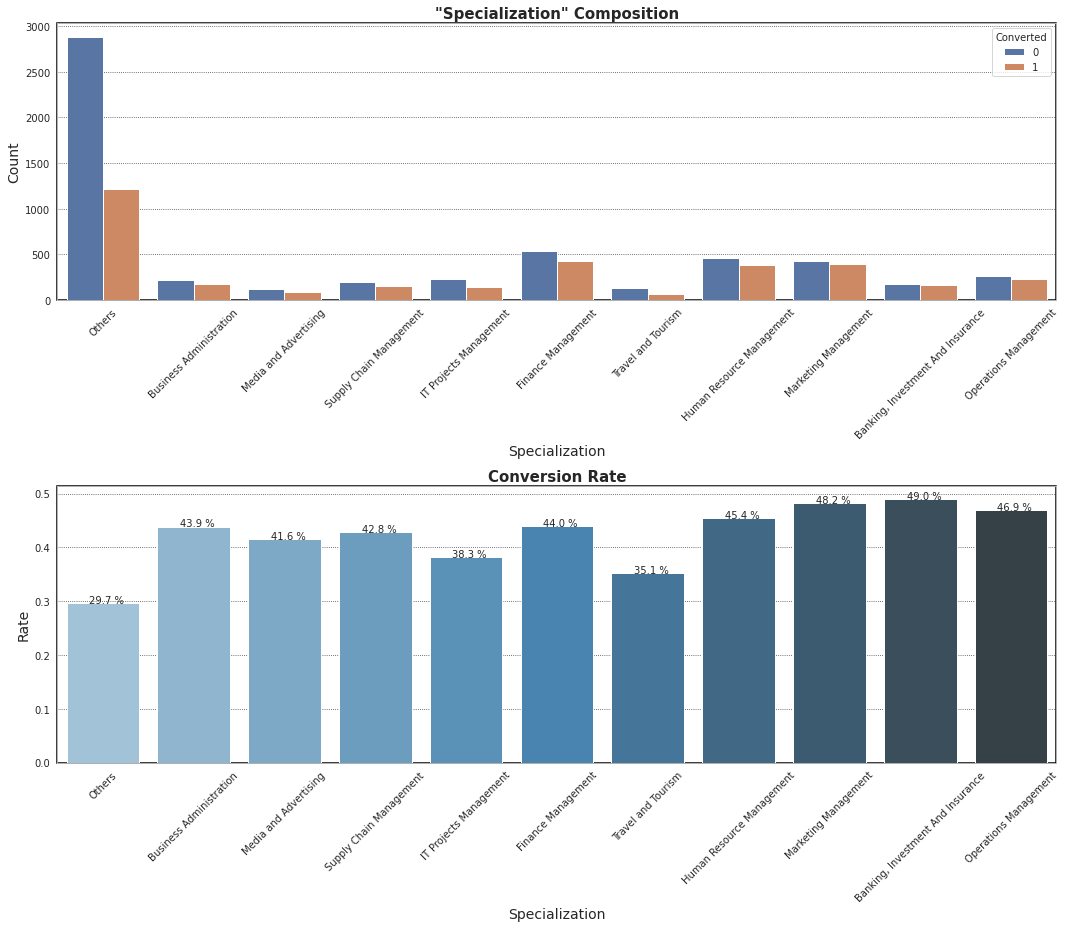

In [77]:
#Specialization

plt.figure(figsize = [15,13])
plt.subplot(211)
hue_count('Specialization', 'Converted')
plt.xticks(rotation = 45)

# Rate of conversion
plt.subplot(212)
conversion_rate_plot('Specialization', 'Converted', p = 'Blues_d')
plt.xticks(rotation = 45)

plt.tight_layout()

1. Focus should be more on the Specialization with high conversion rate.

###City

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



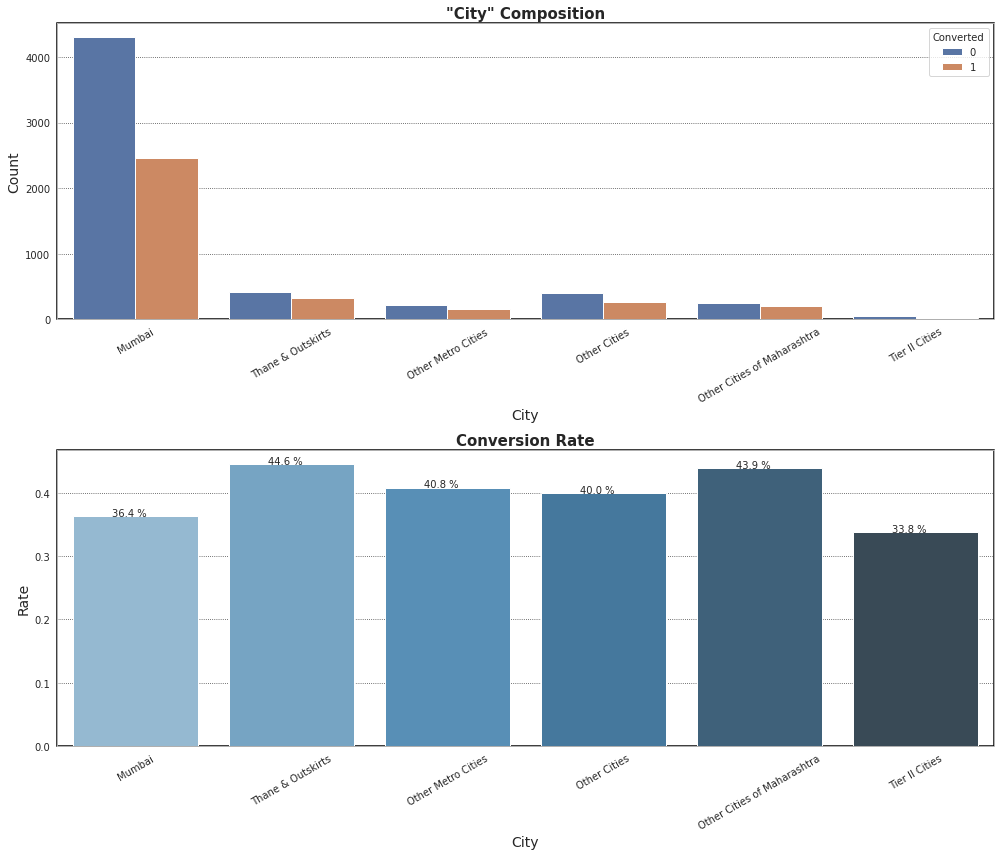

In [78]:
#City

plt.figure(figsize = [14,12])
plt.subplot(211)
hue_count('City', 'Converted')
plt.xticks(rotation = 30)

# Rate of conversion
plt.subplot(212)
conversion_rate_plot('City', 'Converted', p = 'Blues_d')
plt.xticks(rotation = 30)

plt.tight_layout()

A huge proportion of leads acquired are from Mumbai. Conversion rates for all the cities is close to the overall average, 38.5 %.

#Last Notable Activity

In [79]:
df['Last Notable Activity'].value_counts(normalize = True).mul(100).round(2)

Modified                        36.00
Email Opened                    31.11
SMS Sent                        23.72
Page Visited on Website          3.50
Olark Chat Conversation          2.02
Email Link Clicked               1.91
Email Bounced                    0.66
Unsubscribed                     0.50
Unreachable                      0.35
Had a Phone Conversation         0.15
Email Marked Spam                0.02
Approached upfront               0.01
Resubscribed to emails           0.01
View in browser link Clicked     0.01
Form Submitted on Website        0.01
Email Received                   0.01
Name: Last Notable Activity, dtype: float64

In [80]:
#combining less frequent levels into one, 'Others'
x = df['Last Notable Activity'].value_counts(normalize = True).mul(100)
df['Last Notable Activity'] = df['Last Notable Activity'].replace(list(x[x < 1].index), 'Others')

df['Last Notable Activity'].value_counts(normalize = True).mul(100).round(2)

Modified                   36.00
Email Opened               31.11
SMS Sent                   23.72
Page Visited on Website     3.50
Olark Chat Conversation     2.02
Email Link Clicked          1.91
Others                      1.74
Name: Last Notable Activity, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



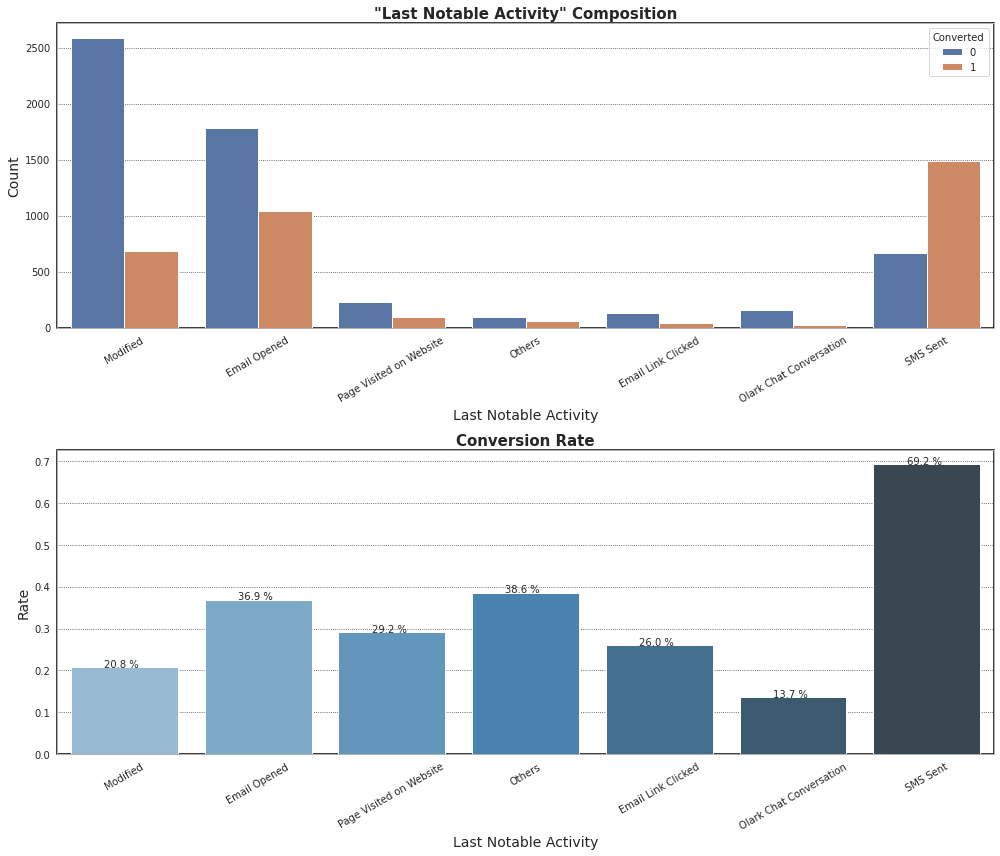

In [81]:
#Last Notable Activity

plt.figure(figsize = [14,12])
plt.subplot(211)
hue_count('Last Notable Activity', 'Converted')
plt.xticks(rotation = 30)

# Rate of conversion
plt.subplot(212)
conversion_rate_plot('Last Notable Activity', 'Converted', p = 'Blues_d')
plt.xticks(rotation = 30)

plt.tight_layout()

###Tags

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



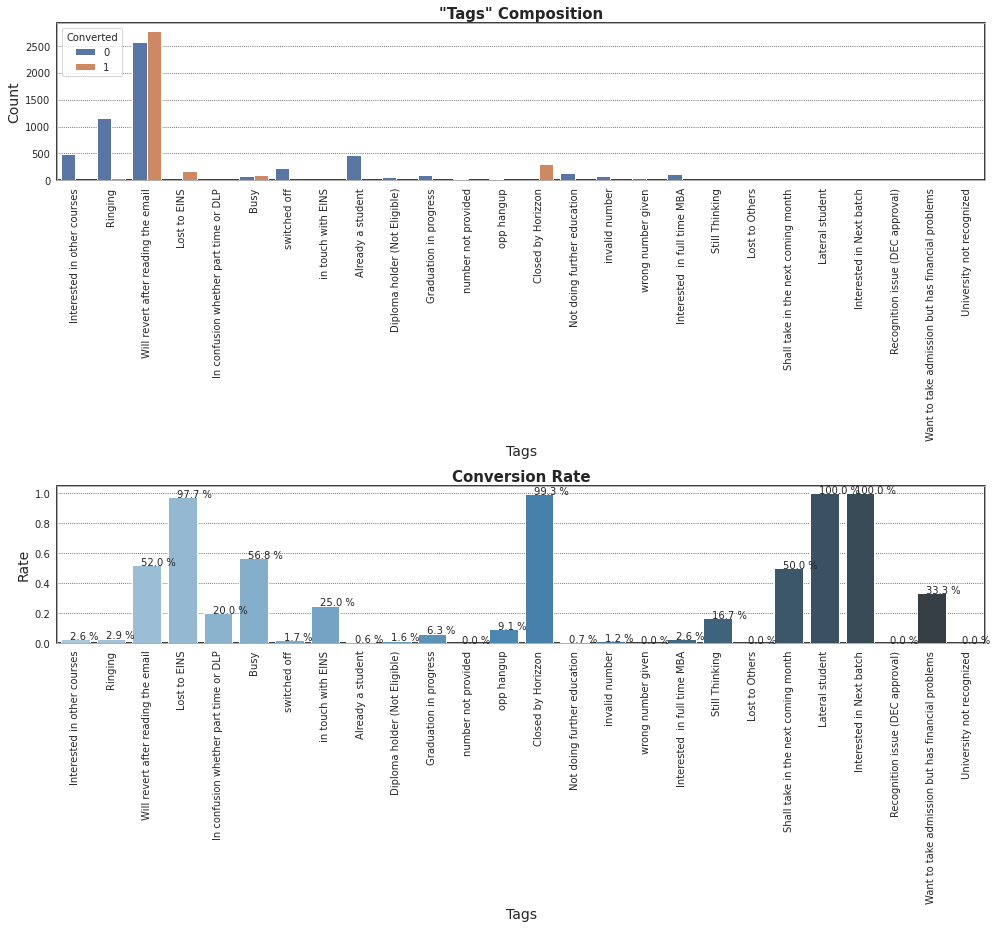

In [82]:
#Tags

plt.figure(figsize = [14,13])
plt.subplot(211)
hue_count('Tags', 'Converted')
plt.xticks(rotation = 90)


# Rate of conversion
plt.subplot(212)
conversion_rate_plot('Tags', 'Converted', p = 'Blues_d')
plt.xticks(rotation = 90)

plt.tight_layout()

* Leads with tags/current status, 'Will revert after reading the email' have a very high likelyhood of converting. This group has high potential leads.

* People with tags, 'Already a Student', 'Interested in other courses', 'Ringing' have very low conversion rate. The company should spend less resources on people in this group.

###Ocupation

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



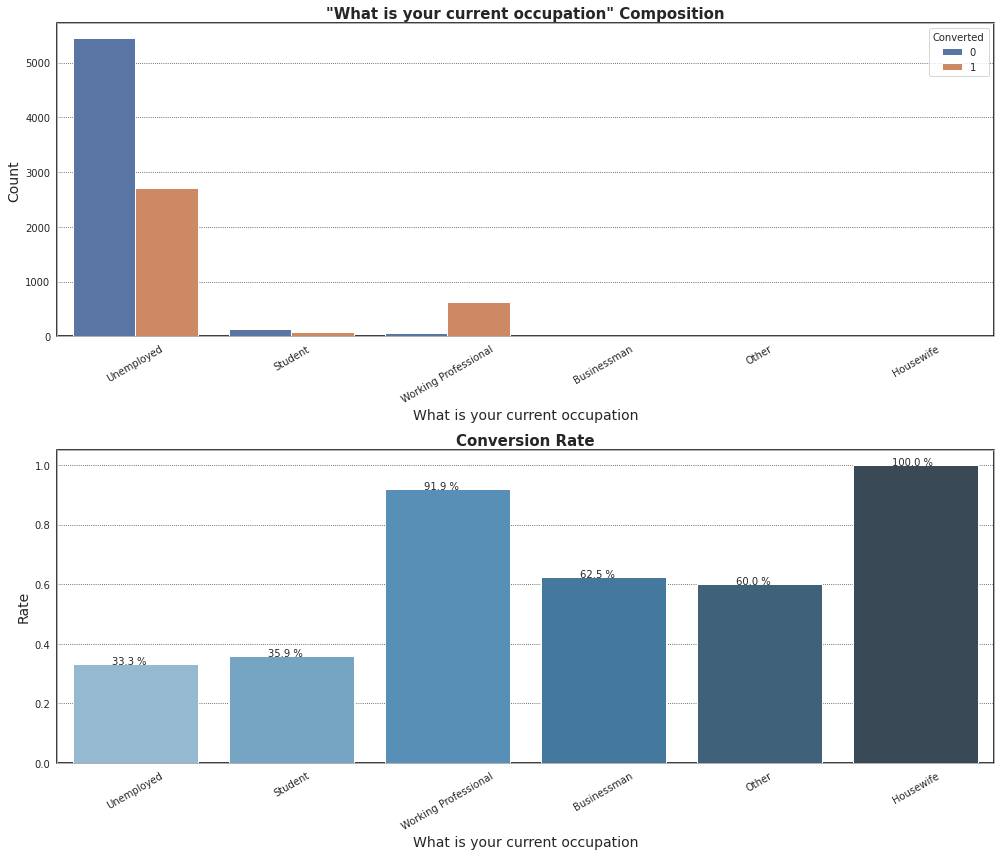

In [83]:
#What is your current occupation

plt.figure(figsize = [14,12])
plt.subplot(211)
hue_count('What is your current occupation', 'Converted')
plt.xticks(rotation = 30)

# Rate of conversion
plt.subplot(212)
conversion_rate_plot('What is your current occupation', 'Converted', p = 'Blues_d')
plt.xticks(rotation = 30)

plt.tight_layout()

* Unemployed people are least likely to convert. Working professionals have a very high conversion rate. They should be targetted more.

* Housewives have a 100% conversion rate but the data for housewives is too small to make a confident inference.

###Analysing Numerical Variables

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='TotalVisits'>

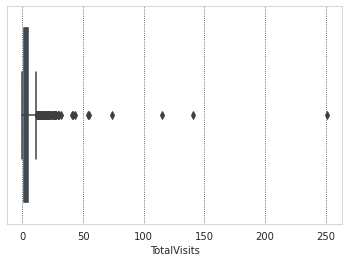

In [84]:
#Total Visit

sns.boxplot(df['TotalVisits'])

In [85]:
percentiles = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]

<ipython-input-85-5f6aaf728a45>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-85-5f6aaf728a45>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='TotalVisits'>

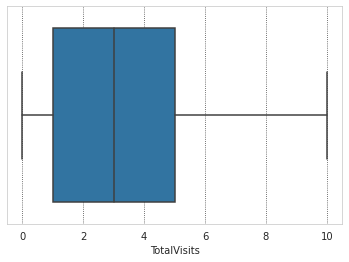

In [86]:
sns.boxplot(df['TotalVisits'])

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

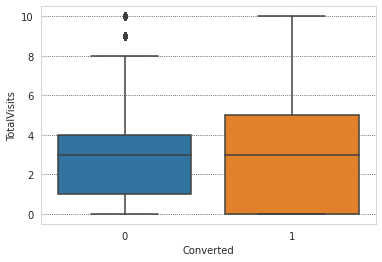

In [87]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)

* Median for converted and not converted leads are the same.

###Time Spent of the website

In [88]:
df['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Total Time Spent on Website'>

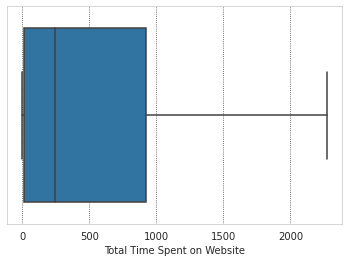

In [89]:
sns.boxplot(df['Total Time Spent on Website'])

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

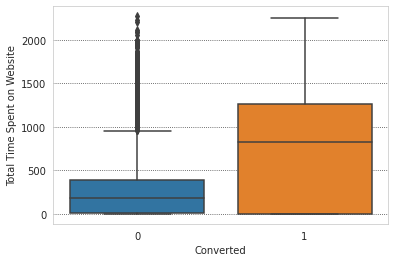

In [90]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)

* Leads spending more time on the weblise are more likely to be converted.

###Page views per visit

In [91]:
df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [92]:
percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<ipython-input-92-918cb4fe21ff>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-92-918cb4fe21ff>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

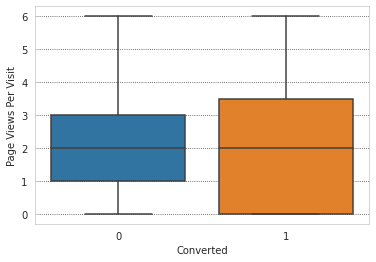

In [93]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)

* Median for converted and unconverted leads is the same.

## Results

Based on the results obtained from the analysis, we are going to eliminate some columns that may contribute noise to the model

#Data Modeling

In [94]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [95]:
data = dataframe.drop(['Lead Number','What matters most to you in choosing a course','Search','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview','Country'],1)

<ipython-input-95-a20aa43a0bda>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [96]:
data.head(2)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,Email Opened


In [97]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   int64  
 4   Do Not Call                      9074 non-null   int64  
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  Tags                

In [99]:
dummy1 = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [100]:
data = pd.concat([data, dummy1], axis=1)
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,0,0,1,0,0,0,0


In [101]:
data = data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)

In [102]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = data.drop(['Prospect ID','Converted'], axis=1)

In [103]:
y = data['Converted']

In [104]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [106]:
import statsmodels.api as sm

In [107]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6269
Model Family:                Binomial   Df Model:                           81
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1244.2
Date:                Sat, 04 Mar 2023   Deviance:                       2488.4
Time:                        01:33:35   Pearson chi2:                 3.27e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6099
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -0.5218      1.872     -0.279      0.780      -4.190       3.147
Do Not Email                                              -1.3795      0.334     -4.125      0.000      -2.035      -0.724
Do Not Call                                               23.9235   1.37e+05      0.000      1.000   -2.68e+05    2.68e+05
TotalVisits                                                0.1975      0.086      2.293      0.022       0.029       0.366
Total Time Spent on Website                                1.1479      0.064     18.064      0.000       1.023       1.272
Page Views Per Visit                                      -0.3222      0.099     -3.256      0.001      -0.516      -0.128
Lead Origin_Landing Page Submission                       -0.7285      0.187     -3.889      0.000      -1.096      -0.361
Lead Origin_Lead Add Form                                 -0.1096      1.346     -0.081      0.935      -2.747       2.528
Lead Origin_Lead Import                                   30.0264   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                     -28.8587   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                         0.1967      0.155      1.270      0.204      -0.107       0.500
Lead Source_Olark Chat                                     0.8958      0.233      3.842      0.000       0.439       1.353
Lead Source_Organic Search                                 0.1927      0.210      0.918      0.359      -0.219       0.604
Lead Source_Others                                         0.7461      0.806      0.926      0.355      -0.834       2.326
Lead Source_Reference                                      1.6933      1.404      1.206      0.228      -1.059       4.446
Lead Source_Referral Sites                                -0.1567      0.493     -0.318      0.750      -1.122       0.809
Lead Source_Welingak Website                               5.2021      1.538      3.383      0.001       2.189       8.216
Last Activity_Email Bounced                               -0.1224      0.711     -0.172      0.863      -1.515       1.271
Last Activity_Email Link Clicked                           0.8677      0.648      1.338      0.181      -0.403       2.138
Last Activity_Email Opened                                 0.0305      0.388      0.079      0.937      -0.730       0.791
Last Activity_Form Submitted on Website                    0.1214      0.593      0.205      0.838      -1.040       1.283
Last Activity_Olark Chat Conversation                     -0.5189      0.394     -1.318      0.188      -1.291       0.253
Last Act

In [108]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()


from sklearn.feature_selection import RFE
rfe = RFE(logreg,  n_features_to_select= 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

In [109]:
rfe.support_

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False,  True, False,  True,  True,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False,  True])

In [110]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 34),
 ('TotalVisits', False, 42),
 ('Total Time Spent on Website', False, 6),
 ('Page Views Per Visit', False, 41),
 ('Lead Origin_Landing Page Submission', False, 18),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 48),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 49),
 ('Lead Source_Others', False, 47),
 ('Lead Source_Reference', False, 63),
 ('Lead Source_Referral Sites', False, 36),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 35),
 ('Last Activity_Email Link Clicked', False, 64),
 ('Last Activity_Email Opened', False, 55),
 ('Last Activity_Form Submitted on Website', False, 61),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', False, 20),
 ('Last Activity_Page Visited on Website', False, 39),
 ('Last Activity_SMS Sent', 

In [111]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_number not provided', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

##Teste Regression Models

In [112]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1557.1
Date:                Sat, 04 Mar 2023   Deviance:                       3114.2
Time:                        01:33:42   Pearson chi2:                 3.06e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5695
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.5611      0.207     -7.553      0.000      -1.966      -1.156
Do Not Email                                -1.3685      0.211     -6.478      0.000      -1.783      -0.954
Lead Origin_Lead Add Form                    1.0562      0.362      2.915      0.004       0.346       1.766
Lead Source_Welingak Website                 3.2675      0.818      3.995      0.000       1.664       4.871
Last Activity_Olark Chat Conversation       -1.3560      0.185     -7.349      0.000      -1.718      -0.994
Tags_Busy                                    3.4344      0.327     10.501      0.000       2.793       4.075
Tags_Closed by Horizzon                      7.7466      0.768     10.089      0.000       6.242       9.252
Tags_Lost to EINS                            8.8822      0.754     11.788      0.000       7.405      10.359
Tags_Ringing                                -2.0808      0.335     -6.209      0.000      -2.738      -1.424
Tags_Will revert after reading the email     3.7354      0.224     16.677      0.000       3.296       4.174
Tags_invalid number                        -22.5787   1.33e+04     -0.002      0.999   -2.62e+04    2.61e+04
Tags_number not provided                   -23.0768   2.35e+04     -0.001      0.999    -4.6e+04     4.6e+04
Tags_switched off                           -2.7005      0.587     -4.604      0.000      -3.850      -1.551
Lead Quality_Not Sure                       -3.4310      0.127    -27.090      0.000      -3.679      -3.183
Lead Quality_Worst                          -3.9191      0.857     -4.572      0.000      -5.599      -2.239
Last Notable Activity_SMS Sent               2.6306      0.123     21.307      0.000       2.389       2.873
============================================================================================================
"""

In [113]:
col1 = col.drop(['Tags_invalid number', 'Tags_number not provided'], 1)

In [114]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1566.8
Date:                Sat, 04 Mar 2023   Deviance:                       3133.5
Time:                        01:33:42   Pearson chi2:                 3.02e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5681
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.8077      0.211     -8.574      0.000      -2.221      -1.394
Do Not Email                                -1.3794      0.210     -6.577      0.000      -1.790      -0.968
Lead Origin_Lead Add Form                    1.1135      0.366      3.042      0.002       0.396       1.831
Lead Source_Welingak Website                 3.2056      0.819      3.912      0.000       1.599       4.812
Last Activity_Olark Chat Conversation       -1.3613      0.184     -7.379      0.000      -1.723      -1.000
Tags_Busy                                    3.7089      0.326     11.369      0.000       3.069       4.348
Tags_Closed by Horizzon                      7.9756      0.769     10.369      0.000       6.468       9.483
Tags_Lost to EINS                            9.1143      0.755     12.078      0.000       7.635      10.593
Tags_Ringing                                -1.7812      0.333     -5.347      0.000      -2.434      -1.128
Tags_Will revert after reading the email     3.9837      0.227     17.538      0.000       3.539       4.429
Tags_switched off                           -2.3911      0.585     -4.087      0.000      -3.538      -1.244
Lead Quality_Not Sure                       -3.4186      0.126    -27.049      0.000      -3.666      -3.171
Lead Quality_Worst                          -3.8680      0.864     -4.475      0.000      -5.562      -2.174
Last Notable Activity_SMS Sent               2.5640      0.121     21.250      0.000       2.328       2.801
============================================================================================================
"""

In [115]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.223991
1012    0.067739
9226    0.000904
4750    0.789428
7987    0.979926
1281    0.991338
2880    0.223991
4971    0.740132
7536    0.898081
1248    0.000904
dtype: float64

In [116]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([2.23990986e-01, 6.77387144e-02, 9.04255965e-04, 7.89428247e-01,
       9.79925562e-01, 9.91338074e-01, 2.23990986e-01, 7.40132407e-01,
       8.98080620e-01, 9.04255965e-04])

In [117]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.223991,3009
1,0,0.067739,1012
2,0,0.000904,9226
3,1,0.789428,4750
4,1,0.979926,7987


In [118]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.223991,3009,0
1,0,0.067739,1012,0
2,0,0.000904,9226,0
3,1,0.789428,4750,1
4,1,0.979926,7987,1


Text(0.5, 1.0, 'Confusion Matrix')

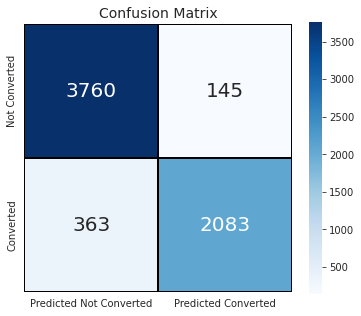

In [139]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
cm_df = pd.DataFrame(data = confusion)
plt.figure(figsize = (6,5))
sns.heatmap(cm_df, fmt='g', 
            yticklabels=['Not Converted', 'Converted'],
            xticklabels=['Predicted Not Converted', 'Predicted Converted'],
            annot=True,
            linewidths=.2,linecolor="k", cmap = "Blues", square=True, annot_kws={"fontsize":20})
plt.title('Confusion Matrix', fontsize=14)

In [120]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9200125964415052


In [141]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [140]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

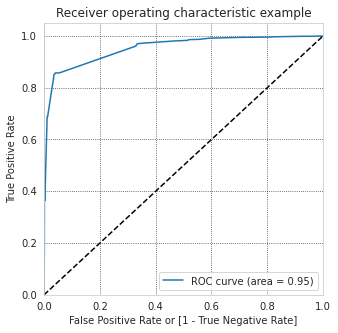

In [142]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

##Finding Optimal Cutoff Point

In [143]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.223991,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.067739,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000904,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.789428,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.979926,7987,1,1,1,1,1,1,1,1,1,1,1


In [144]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.764919  0.973017  0.634571
0.2   0.2  0.782711  0.960752  0.671191
0.3   0.3  0.919383  0.856909  0.958515
0.4   0.4  0.920170  0.856092  0.960307
0.5   0.5  0.920013  0.851594  0.962868
0.6   0.6  0.920170  0.851594  0.963124
0.7   0.7  0.915131  0.834015  0.965941
0.8   0.8  0.872776  0.690515  0.986940
0.9   0.9  0.790427  0.464023  0.994878


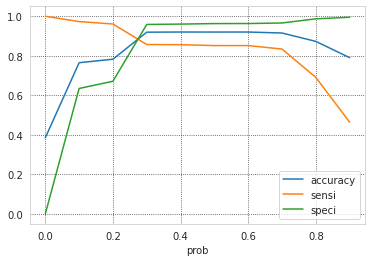

In [145]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [149]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.24 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.223991,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.067739,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000904,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.789428,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.979926,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [150]:
#Assingning lead score

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.223991,3009,0,1,1,1,0,0,0,0,0,0,0,0,22
1,0,0.067739,1012,0,1,0,0,0,0,0,0,0,0,0,0,7
2,0,0.000904,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.789428,4750,1,1,1,1,1,1,1,1,1,0,0,1,79
4,1,0.979926,7987,1,1,1,1,1,1,1,1,1,1,1,1,98


In [151]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [152]:
#Sensitive
TP / float(TP+FN)

0.857318070318888

In [154]:
# Calculate false postive
print(FP/ float(TN+FP))

0.05505761843790013


In [153]:
#Specificity
TN / float(TN+FP)

0.9449423815620999

In [155]:
# Negative 
print (TN / float(TN+ FN))

0.9135924733845011


In [156]:
# Positive
print (TP / float(TP+FP))

0.9070069204152249


In [157]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3760,  145],
       [ 363, 2083]])